#### Upon observing the Test Data, it was observed that the test data had the exact similar presence/absence of nan-values,outliers etc. So, to prepare the test data for the model, THE EXACT pre-processing/cleaning steps followed for preparing the Training data, was copied and used accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\User\Desktop\sales_prediction\Test.csv")

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


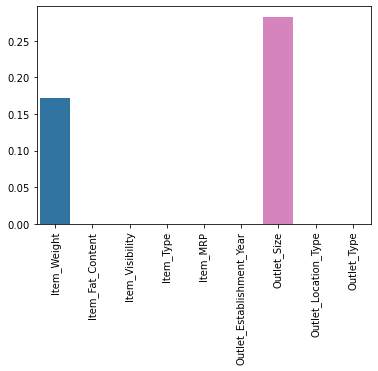

In [4]:
a=data['Item_Weight'].isna().sum()/len(data)
b=data['Item_Fat_Content'].isna().sum()/len(data)
c=data['Item_Visibility'].isna().sum()/len(data)
d=data['Item_Type'].isna().sum()/len(data)
e=data['Item_MRP'].isna().sum()/len(data)
f=data['Outlet_Establishment_Year'].isna().sum()/len(data)
g=data['Outlet_Size'].isna().sum()/len(data)
h=data['Outlet_Location_Type'].isna().sum()/len(data)
i=data['Outlet_Type'].isna().sum()/len(data)




sns.barplot(y=[a,b,c,d,e,f,g,h,i],x=['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

plt.xticks(rotation = 90) 
plt.show()


In [93]:
data1=data
def encode_categorical(data1):
    data1['Outlet_Size']=data1['Outlet_Size'].replace('Small',value=0)
    data1['Outlet_Size']=data1['Outlet_Size'].replace('Medium',value=1)
    data1['Outlet_Size']=data1['Outlet_Size'].replace('High',value=2)
    
    data1['Outlet_Location_Type']=data1['Outlet_Location_Type'].replace('Tier 3',value=1)
    data1['Outlet_Location_Type']=data1['Outlet_Location_Type'].replace('Tier 2',value=2)
    data1['Outlet_Location_Type']=data1['Outlet_Location_Type'].replace('Tier 1',value=3)
    
    data1['Item_Fat_Content']=data1['Item_Fat_Content'].replace(['Low Fat','LF','low fat'],value=0)
    data1['Item_Fat_Content']=data1['Item_Fat_Content'].replace(['Regular','reg'],value=1)
    data1['Item_Fat_Content'].value_counts()

    return data1



def decode_categorical(data1):
    data1['Outlet_Size']=data1['Outlet_Size'].replace(value='Small',to_replace=0)
    data1['Outlet_Size']=data1['Outlet_Size'].replace(value='Medium',to_replace=1)
    data1['Outlet_Size']=data1['Outlet_Size'].replace(value='High',to_replace=2)
    
    data1['Outlet_Location_Type']=data1['Outlet_Location_Type'].replace(value='Tier 3',to_replace=1)
    data1['Outlet_Location_Type']=data1['Outlet_Location_Type'].replace(value='Tier 2',to_replace=2)
    data1['Outlet_Location_Type']=data1['Outlet_Location_Type'].replace(value='Tier 1',to_replace=3)
    
    data1['Item_Fat_Content']=data1['Item_Fat_Content'].replace(value='Low Fat',to_replace=0)
    data1['Item_Fat_Content']=data1['Item_Fat_Content'].replace(value='Regular',to_replace=1)
    data1['Item_Fat_Content'].value_counts()

    return data1


encode_categorical(data)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,12,1.0,3,Supermarket Type1
1,FDW14,8.300,1,0.038428,Dairy,87.3198,OUT017,4,NaN,2,Supermarket Type1
2,NCN55,14.600,0,0.099575,Others,241.7538,OUT010,13,NaN,1,Grocery Store
3,FDQ58,7.315,0,0.015388,Snack Foods,155.0340,OUT017,4,NaN,2,Supermarket Type1
4,FDY38,NaN,1,0.118599,Dairy,234.2300,OUT027,26,1.0,1,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,1,0.013496,Snack Foods,141.3154,OUT046,14,0.0,3,Supermarket Type1
5677,FDD47,7.600,1,0.142991,Starchy Foods,169.1448,OUT018,2,1.0,1,Supermarket Type2
5678,NCO17,10.000,0,0.073529,Health and Hygiene,118.7440,OUT045,9,NaN,2,Supermarket Type1
5679,FDJ26,15.300,1,0.000000,Canned,214.6218,OUT017,4,NaN,2,Supermarket Type1


In [94]:
data_outletsize_notnan=data[data['Outlet_Size'].notna()]

data_outletsize_notnan.reset_index(drop=True)




,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,0,0.007565,Snack Foods,107.8622,OUT049,12,1.0,3,Supermarket Type1
1,FDY38,NaN,1,0.118599,Dairy,234.2300,OUT027,26,1.0,1,Supermarket Type3
2,FDH56,9.80,1,0.063817,Fruits and Vegetables,117.1492,OUT046,14,0.0,3,Supermarket Type1
3,FDL48,19.35,1,0.082602,Baking Goods,50.1034,OUT018,2,1.0,1,Supermarket Type2
4,FDC48,NaN,0,0.015782,Baking Goods,81.0592,OUT027,26,1.0,1,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
4070,FDF46,7.07,0,0.094053,Snack Foods,116.0834,OUT018,2,1.0,1,Supermarket Type2
4071,DRL35,15.70,0,0.030704,Hard Drinks,43.2770,OUT046,14,0.0,3,Supermarket Type1
4072,FDW46,13.00,1,0.070411,Snack Foods,63.4484,OUT049,12,1.0,3,Supermarket Type1
4073,FDB58,10.50,1,0.013496,Snack Foods,141.3154,OUT046,14,0.0,3,Supermarket Type1


In [95]:
data_Iw_nan=data[data['Outlet_Size'].isna()]
data_Iw_nan['Outlet_Type'].value_counts()

Supermarket Type1    1236
Grocery Store         370
Name: Outlet_Type, dtype: int64

In [96]:
data_nan_supr=data_Iw_nan[data_Iw_nan['Outlet_Type']=='Supermarket Type1']
data_supr=data[data['Outlet_Type']=='Supermarket Type1']



data_nan_grocery=data_Iw_nan[data_Iw_nan['Outlet_Type']=='Grocery Store']
data_grocery=data[data['Outlet_Type']=='Grocery Store']


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Outlet_Size'>

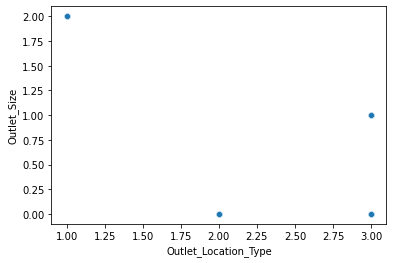

In [97]:
sns.scatterplot(x=data_supr['Outlet_Location_Type'], y=data_supr['Outlet_Size'])

In [98]:
data_nan_supr['Outlet_Location_Type'].value_counts()

2    1236
Name: Outlet_Location_Type, dtype: int64

In [99]:
data_supr['Outlet_Size'].value_counts()

0.0    1240
2.0     621
1.0     620
Name: Outlet_Size, dtype: int64

In [100]:
data_grocery['Outlet_Size'].value_counts()

0.0    352
Name: Outlet_Size, dtype: int64

In [101]:
#filling the nan values thus, accordingly.


data_nan_supr['Outlet_Size'].fillna(value=0.0,inplace=True)
data_nan_grocery['Outlet_Size'].fillna(value=0.0,inplace=True)

data_filled_nans_outletsize=pd.concat([data_nan_supr,data_nan_grocery])
data_filled_nans_outletsize.reset_index(drop=True)



C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW14,8.300,1,0.038428,Dairy,87.3198,OUT017,4,0.0,2,Supermarket Type1
1,FDQ58,7.315,0,0.015388,Snack Foods,155.0340,OUT017,4,0.0,2,Supermarket Type1
2,FDN33,6.305,1,0.123365,Snack Foods,95.7436,OUT045,9,0.0,2,Supermarket Type1
3,FDA36,5.985,0,0.005698,Baking Goods,186.8924,OUT017,4,0.0,2,Supermarket Type1
4,FDT44,16.600,0,0.103569,Fruits and Vegetables,118.3466,OUT017,4,0.0,2,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
1601,FDI15,13.800,0,0.236595,Dairy,265.0884,OUT010,13,0.0,1,Grocery Store
1602,NCH43,8.420,0,0.118118,Household,216.9192,OUT010,13,0.0,1,Grocery Store
1603,FDA23,9.800,0,0.078981,Baking Goods,100.1016,OUT010,13,0.0,1,Grocery Store
1604,FDC10,9.800,1,0.121982,Snack Foods,119.7098,OUT010,13,0.0,1,Grocery Store


In [102]:
data_final=pd.concat([data_outletsize_notnan,data_filled_nans_outletsize])



data_itemweight_notnan=data_final[data_final['Item_Weight'].notna()]

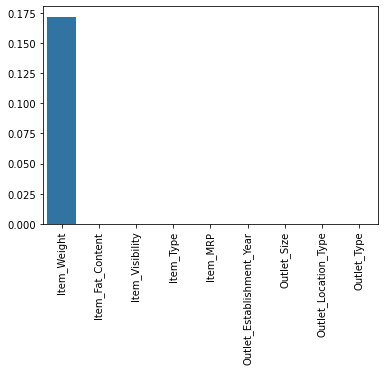

In [103]:
a=data_final['Item_Weight'].isna().sum()/len(data)
b=data_final['Item_Fat_Content'].isna().sum()/len(data)
c=data_final['Item_Visibility'].isna().sum()/len(data)
d=data_final['Item_Type'].isna().sum()/len(data)
e=data_final['Item_MRP'].isna().sum()/len(data)
f=data_final['Outlet_Establishment_Year'].isna().sum()/len(data)
g=data_final['Outlet_Size'].isna().sum()/len(data)
h=data_final['Outlet_Location_Type'].isna().sum()/len(data)
i=data_final['Outlet_Type'].isna().sum()/len(data)




sns.barplot(y=[a,b,c,d,e,f,g,h,i],x=['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

plt.xticks(rotation = 90) 
plt.show()


In [104]:
def year_encoder(data):
    d={1985:26,1987:24,1997:14,1998:13,1999:12,2002:9,2004:7,2007:4,2009:2}
    for k in d:
        data['Outlet_Establishment_Year']=data['Outlet_Establishment_Year'].replace(to_replace=k, value=d[k])
def year_decoder(data):
    d={1985:26,1987:24,1997:14,1998:13,1999:12,2002:9,2004:7,2007:4,2009:2}
    for k in d:
        data['Outlet_Establishment_Year']=data['Outlet_Establishment_Year'].replace(value=k, to_replace=d[k])

year_encoder(data)

In [105]:
data_final.drop(['Item_Identifier','Outlet_Identifier'], axis=1)

data_final.reset_index(drop=True)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,0,0.007565,Snack Foods,107.8622,OUT049,12,1.0,3,Supermarket Type1
1,FDY38,NaN,1,0.118599,Dairy,234.2300,OUT027,26,1.0,1,Supermarket Type3
2,FDH56,9.80,1,0.063817,Fruits and Vegetables,117.1492,OUT046,14,0.0,3,Supermarket Type1
3,FDL48,19.35,1,0.082602,Baking Goods,50.1034,OUT018,2,1.0,1,Supermarket Type2
4,FDC48,NaN,0,0.015782,Baking Goods,81.0592,OUT027,26,1.0,1,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDI15,13.80,0,0.236595,Dairy,265.0884,OUT010,13,0.0,1,Grocery Store
5677,NCH43,8.42,0,0.118118,Household,216.9192,OUT010,13,0.0,1,Grocery Store
5678,FDA23,9.80,0,0.078981,Baking Goods,100.1016,OUT010,13,0.0,1,Grocery Store
5679,FDC10,9.80,1,0.121982,Snack Foods,119.7098,OUT010,13,0.0,1,Grocery Store


In [106]:

data_final.reset_index(drop=True)

data_weightnan=data_final[data_final['Item_Weight'].isna()]



In [107]:
data_weightnan.reset_index(drop=True)
fav=data_final[data_final['Item_Type']=='Fruits and Vegetables']['Item_Weight'].mean()

data_weightnan[data_weightnan['Item_Type']=='Fruits and Vegetables']['Item_Weight'].fillna(fav,inplace=True)


data_weightnan

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4,FDY38,NaN,1,0.118599,Dairy,234.2300,OUT027,26,1.0,1,Supermarket Type3
7,FDC48,NaN,0,0.015782,Baking Goods,81.0592,OUT027,26,1.0,1,Supermarket Type3
12,NCC54,NaN,0,0.171079,Health and Hygiene,240.4196,OUT019,26,0.0,3,Grocery Store
18,NCM42,NaN,0,0.028184,Household,109.6912,OUT027,26,1.0,1,Supermarket Type3
23,NCL19,NaN,0,0.027447,Others,142.3470,OUT019,26,0.0,3,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
5655,FDX32,NaN,1,0.099375,Fruits and Vegetables,143.6786,OUT027,26,1.0,1,Supermarket Type3
5656,FDC39,NaN,0,0.158425,Dairy,207.8296,OUT027,26,1.0,1,Supermarket Type3
5661,DRG37,NaN,0,0.000000,Soft Drinks,155.7972,OUT027,26,1.0,1,Supermarket Type3
5665,DRE03,NaN,0,0.024110,Dairy,46.0718,OUT027,26,1.0,1,Supermarket Type3


In [108]:
data_weightnan.reset_index(drop=True)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDY38,NaN,1,0.118599,Dairy,234.2300,OUT027,26,1.0,1,Supermarket Type3
1,FDC48,NaN,0,0.015782,Baking Goods,81.0592,OUT027,26,1.0,1,Supermarket Type3
2,NCC54,NaN,0,0.171079,Health and Hygiene,240.4196,OUT019,26,0.0,3,Grocery Store
3,NCM42,NaN,0,0.028184,Household,109.6912,OUT027,26,1.0,1,Supermarket Type3
4,NCL19,NaN,0,0.027447,Others,142.3470,OUT019,26,0.0,3,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
971,FDX32,NaN,1,0.099375,Fruits and Vegetables,143.6786,OUT027,26,1.0,1,Supermarket Type3
972,FDC39,NaN,0,0.158425,Dairy,207.8296,OUT027,26,1.0,1,Supermarket Type3
973,DRG37,NaN,0,0.000000,Soft Drinks,155.7972,OUT027,26,1.0,1,Supermarket Type3
974,DRE03,NaN,0,0.024110,Dairy,46.0718,OUT027,26,1.0,1,Supermarket Type3


In [109]:
#fav=data_final[data_final['Item_Type']=='Fruits and Vegetables']['Item_Weight'].mean()
df_fav=data_weightnan[data_weightnan['Item_Type']=='Fruits and Vegetables']
df_fav.fillna(data_final[data_final['Item_Type']=='Fruits and Vegetables']['Item_Weight'].mean(),inplace=True)


df_snc=data_weightnan[data_weightnan['Item_Type']=='Snack Foods']
df_snc.fillna(data_final[data_final['Item_Type']=='Snack Foods']['Item_Weight'].mean(),inplace=True)


df_hsld=data_weightnan[data_weightnan['Item_Type']=='Houseold']
df_hsld.fillna(data_final[data_final['Item_Type']=='Houseold']['Item_Weight'].mean(),inplace=True)


df_frzn=data_weightnan[data_weightnan['Item_Type']=='Frozen Foods']
df_frzn.fillna(data_final[data_final['Item_Type']=='Frozen Foods']['Item_Weight'].mean(),inplace=True)


df_dary=data_weightnan[data_weightnan['Item_Type']=='Dairy']
df_dary.fillna(data_final[data_final['Item_Type']=='Dairy']['Item_Weight'].mean(),inplace=True)


df_bkg=data_weightnan[data_weightnan['Item_Type']=='Baking Goods']
df_bkg.fillna(data_final[data_final['Item_Type']=='Baking Goods']['Item_Weight'].mean(),inplace=True)

df_cnnd=data_weightnan[data_weightnan['Item_Type']=='Canned']
df_cnnd.fillna(data_final[data_final['Item_Type']=='Canned']['Item_Weight'].mean(),inplace=True)

df_hah=data_weightnan[data_weightnan['Item_Type']=='Health and Hygiene']
df_hah.fillna(data_final[data_final['Item_Type']=='Health and Hygiene']['Item_Weight'].mean(),inplace=True)


df_met=data_weightnan[data_weightnan['Item_Type']=='Meat']
df_met.fillna(data_final[data_final['Item_Type']=='Meat']['Item_Weight'].mean(),inplace=True)


df_sft=data_weightnan[data_weightnan['Item_Type']=='Soft Drinks']
df_sft.fillna(data_final[data_final['Item_Type']=='Soft Drinks']['Item_Weight'].mean(),inplace=True)


df_brea=data_weightnan[data_weightnan['Item_Type']=='Breads']
df_brea.fillna(data_final[data_final['Item_Type']=='Breads']['Item_Weight'].mean(),inplace=True)

df_oth=data_weightnan[data_weightnan['Item_Type']=='Others']
df_oth.fillna(data_final[data_final['Item_Type']=='Others']['Item_Weight'].mean(),inplace=True)

df_hrdnk=data_weightnan[data_weightnan['Item_Type']=='Hard Drinks']
df_hrdnk.fillna(data_final[data_final['Item_Type']=='Hard Drinks']['Item_Weight'].mean(),inplace=True)

df_brkfst=data_weightnan[data_weightnan['Item_Type']=='Breakfast']
df_brkfst.fillna(data_final[data_final['Item_Type']=='Breakfast']['Item_Weight'].mean(),inplace=True)

df_strchy=data_weightnan[data_weightnan['Item_Type']=='Starchy Foods']
df_strchy.fillna(data_final[data_final['Item_Type']=='Starchy Foods']['Item_Weight'].mean(),inplace=True)

df_seafo=data_weightnan[data_weightnan['Item_Type']=='Sea Foods']
df_seafo.fillna(data_final[data_final['Item_Type']=='Sea Foods']['Item_Weight'].mean(),inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [110]:
data_weight_fillednan=pd.concat([df_fav, df_snc, df_bkg, df_brea, df_brkfst, df_cnnd, df_dary, df_frzn, df_hah, df_hrdnk, df_hsld, df_met, df_oth, df_seafo, df_sft, df_strchy])

In [111]:
data_to_model=pd.concat([data_itemweight_notnan, data_weight_fillednan])

In [112]:
data_to_model.reset_index(drop=True)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,12,1.0,3,Supermarket Type1
1,FDH56,9.800000,1,0.063817,Fruits and Vegetables,117.1492,OUT046,14,0.0,3,Supermarket Type1
2,FDL48,19.350000,1,0.082602,Baking Goods,50.1034,OUT018,2,1.0,1,Supermarket Type2
3,FDU11,4.785000,0,0.092738,Breads,122.3098,OUT049,12,1.0,3,Supermarket Type1
4,DRL59,16.750000,0,0.021206,Hard Drinks,52.0298,OUT013,24,2.0,1,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5561,FDF59,13.618247,0,0.124739,Starchy Foods,128.1020,OUT019,26,0.0,3,Grocery Store
5562,FDG47,13.618247,0,0.069282,Starchy Foods,263.5252,OUT027,26,1.0,1,Supermarket Type3
5563,FDF59,13.618247,0,0.070899,Starchy Foods,128.0020,OUT027,26,1.0,1,Supermarket Type3
5564,FDH47,13.618247,1,0.128192,Starchy Foods,96.8068,OUT027,26,1.0,1,Supermarket Type3


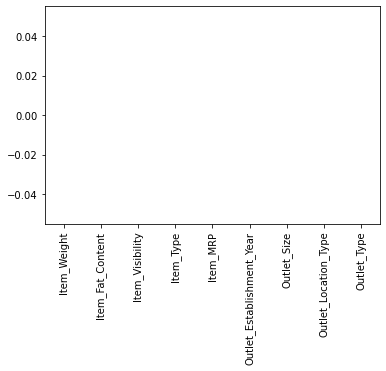

In [113]:
a=data_to_model['Item_Weight'].isna().sum()/len(data)
b=data_to_model['Item_Fat_Content'].isna().sum()/len(data)
c=data_to_model['Item_Visibility'].isna().sum()/len(data)
d=data_to_model['Item_Type'].isna().sum()/len(data)
e=data_to_model['Item_MRP'].isna().sum()/len(data)
f=data_to_model['Outlet_Establishment_Year'].isna().sum()/len(data)
g=data_to_model['Outlet_Size'].isna().sum()/len(data)
h=data_to_model['Outlet_Location_Type'].isna().sum()/len(data)
i=data_to_model['Outlet_Type'].isna().sum()/len(data)




sns.barplot(y=[a,b,c,d,e,f,g,h,i],x=['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

plt.xticks(rotation = 90) 
plt.show()


In [114]:
data_visib_zero=data_to_model[data_to_model['Item_Visibility']==0.00]


o18=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT018']
o18['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT018']['Item_Visibility'].mean(),inplace=True)

o46=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT046']
o46['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT046']['Item_Visibility'].mean(), inplace=True)

o13=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT013']
o13['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT013']['Item_Visibility'].mean(), inplace=True)

o45=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT045']
o45['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT045']['Item_Visibility'].mean(), inplace=True)

o17=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT017']
o17['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT017']['Item_Visibility'].mean(), inplace=True)

o27=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT027']
o27['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT027']['Item_Visibility'].mean(), inplace=True)

o35=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT035']
o35['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT035']['Item_Visibility'].mean(), inplace=True)

o49=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT049']
o49['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT049']['Item_Visibility'].mean(), inplace=True)

o10=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT010']
o10['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT010']['Item_Visibility'].mean(), inplace=True)

o19=data_visib_zero[data_visib_zero['Outlet_Identifier']=='OUT019']
o19['Item_Visibility'].replace(to_replace=0.0, value=data_to_model[data_to_model['Outlet_Identifier']=='OUT019']['Item_Visibility'].mean(),inplace=True)



data_filled_visib=pd.concat([o18, o46, o13, o45, o17, o27, o35, o49, o10, o19])



C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [115]:
data_to_model=data_to_model[data_to_model.Item_Visibility!=0.0]

data_to_model=pd.concat([data_to_model,data_filled_visib])


data_to_model

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,12,1.0,3,Supermarket Type1
5,FDH56,9.800000,1,0.063817,Fruits and Vegetables,117.1492,OUT046,14,0.0,3,Supermarket Type1
6,FDL48,19.350000,1,0.082602,Baking Goods,50.1034,OUT018,2,1.0,1,Supermarket Type2
13,FDU11,4.785000,0,0.092738,Breads,122.3098,OUT049,12,1.0,3,Supermarket Type1
14,DRL59,16.750000,0,0.021206,Hard Drinks,52.0298,OUT013,24,2.0,1,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
1807,NCQ41,13.216929,0,0.106515,Health and Hygiene,193.5794,OUT019,26,0.0,3,Grocery Store
3085,NCY17,13.216929,0,0.106515,Health and Hygiene,42.9086,OUT019,26,0.0,3,Grocery Store
4276,DRK59,11.844417,0,0.106515,Hard Drinks,234.1616,OUT019,26,0.0,3,Grocery Store
3604,FDA39,12.702148,0,0.106515,Meat,39.5822,OUT019,26,0.0,3,Grocery Store


In [116]:
data_to_model.drop(['Item_Identifier','Outlet_Identifier'], axis=1)

data_not_dummied=data_to_model

In [117]:
data_dum=pd.get_dummies(data_to_model,columns=['Outlet_Type','Item_Type'])

year_encoder(data_dum)

In [118]:
data_dum.drop(['Item_Identifier','Outlet_Identifier'], axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.750000,0,0.007565,107.8622,12,1.0,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,9.800000,1,0.063817,117.1492,14,0.0,3,0,1,0,...,1,0,0,0,0,0,0,0,0,0
6,19.350000,1,0.082602,50.1034,2,1.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,4.785000,0,0.092738,122.3098,12,1.0,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14,16.750000,0,0.021206,52.0298,24,2.0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,13.216929,0,0.106515,193.5794,26,0.0,3,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3085,13.216929,0,0.106515,42.9086,26,0.0,3,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4276,11.844417,0,0.106515,234.1616,26,0.0,3,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3604,12.702148,0,0.106515,39.5822,26,0.0,3,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [119]:
data_dum.reset_index(drop=True)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Grocery Store,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDW58,20.750000,0,0.007565,107.8622,OUT049,12,1.0,3,0,...,0,0,0,0,0,0,0,1,0,0
1,FDH56,9.800000,1,0.063817,117.1492,OUT046,14,0.0,3,0,...,1,0,0,0,0,0,0,0,0,0
2,FDL48,19.350000,1,0.082602,50.1034,OUT018,2,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,FDU11,4.785000,0,0.092738,122.3098,OUT049,12,1.0,3,0,...,0,0,0,0,0,0,0,0,0,0
4,DRL59,16.750000,0,0.021206,52.0298,OUT013,24,2.0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561,NCQ41,13.216929,0,0.106515,193.5794,OUT019,26,0.0,3,1,...,0,0,1,0,0,0,0,0,0,0
5562,NCY17,13.216929,0,0.106515,42.9086,OUT019,26,0.0,3,1,...,0,0,1,0,0,0,0,0,0,0
5563,DRK59,11.844417,0,0.106515,234.1616,OUT019,26,0.0,3,1,...,0,1,0,0,0,0,0,0,0,0
5564,FDA39,12.702148,0,0.106515,39.5822,OUT019,26,0.0,3,1,...,0,0,0,0,1,0,0,0,0,0


In [120]:
data_dum[data_dum['Outlet_Identifier']=='OUT027']['Item_Visibility'].max()

0.186650368

In [121]:
data_dum_to_model=data_dum



In [122]:
data_dum_to_model.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.750000,0,0.007565,107.8622,12,1.0,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,9.800000,1,0.063817,117.1492,14,0.0,3,0,1,0,...,1,0,0,0,0,0,0,0,0,0
6,19.350000,1,0.082602,50.1034,2,1.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,4.785000,0,0.092738,122.3098,12,1.0,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14,16.750000,0,0.021206,52.0298,24,2.0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,13.216929,0,0.106515,193.5794,26,0.0,3,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3085,13.216929,0,0.106515,42.9086,26,0.0,3,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4276,11.844417,0,0.106515,234.1616,26,0.0,3,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3604,12.702148,0,0.106515,39.5822,26,0.0,3,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Using job-lib the model which was built and saved with the training data was loaded and used for the test data

In [123]:
import joblib
filename = 'finalized_model.sav'
loaded_model = joblib.load(filename)

In [124]:
data_dum_to_model

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Grocery Store,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDW58,20.750000,0,0.007565,107.8622,OUT049,12,1.0,3,0,...,0,0,0,0,0,0,0,1,0,0
5,FDH56,9.800000,1,0.063817,117.1492,OUT046,14,0.0,3,0,...,1,0,0,0,0,0,0,0,0,0
6,FDL48,19.350000,1,0.082602,50.1034,OUT018,2,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
13,FDU11,4.785000,0,0.092738,122.3098,OUT049,12,1.0,3,0,...,0,0,0,0,0,0,0,0,0,0
14,DRL59,16.750000,0,0.021206,52.0298,OUT013,24,2.0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,NCQ41,13.216929,0,0.106515,193.5794,OUT019,26,0.0,3,1,...,0,0,1,0,0,0,0,0,0,0
3085,NCY17,13.216929,0,0.106515,42.9086,OUT019,26,0.0,3,1,...,0,0,1,0,0,0,0,0,0,0
4276,DRK59,11.844417,0,0.106515,234.1616,OUT019,26,0.0,3,1,...,0,1,0,0,0,0,0,0,0,0
3604,FDA39,12.702148,0,0.106515,39.5822,OUT019,26,0.0,3,1,...,0,0,0,0,1,0,0,0,0,0


In [125]:
X_results=loaded_model.predict(data_dum_to_model.drop(['Item_Identifier','Outlet_Identifier'], axis=1))

In [126]:
print(X_results)

[1663.0625606  1816.9577644   667.39773329 ...  589.70926301   82.19995397
  118.10288776]


In [127]:
data_not_dummied['Predicted_Sales']=X_results

In [128]:
testdata_with_predictions=data_not_dummied

### The final sales prediction results of the test data 

In [165]:
decode_categorical(testdata_with_predictions)
year_decoder(testdata_with_predictions)


testdata_with_predictions.to_excel('Test data with results.xlsx')

testdata_with_predictions

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_Sales
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1663.062561
5,FDH56,9.800000,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1,1816.957764
6,FDL48,19.350000,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2,667.397733
13,FDU11,4.785000,Low Fat,0.092738,Breads,122.3098,OUT049,1999,Medium,Tier 1,Supermarket Type1,2018.974073
14,DRL59,16.750000,Low Fat,0.021206,Hard Drinks,52.0298,OUT013,1987,High,Tier 3,Supermarket Type1,749.815744
...,...,...,...,...,...,...,...,...,...,...,...,...
1807,NCQ41,13.216929,Low Fat,0.106515,Health and Hygiene,193.5794,OUT019,1985,Small,Tier 1,Grocery Store,588.999000
3085,NCY17,13.216929,Low Fat,0.106515,Health and Hygiene,42.9086,OUT019,1985,Small,Tier 1,Grocery Store,101.904090
4276,DRK59,11.844417,Low Fat,0.106515,Hard Drinks,234.1616,OUT019,1985,Small,Tier 1,Grocery Store,589.709263
3604,FDA39,12.702148,Low Fat,0.106515,Meat,39.5822,OUT019,1985,Small,Tier 1,Grocery Store,82.199954


In [140]:
testdata_with_predictions['Item_Identifier'].value_counts()

FDK57    8
FDW10    8
DRF48    8
FDN52    8
FDZ50    8
        ..
FDK58    1
FDD50    1
FDY55    1
FDF52    1
FDL20    1
Name: Item_Identifier, Length: 1542, dtype: int64

In [135]:
Outlet_list=['OUT017','OUT018','OUT035','OUT046','OUT049','OUT045','OUT027','OUT013','OUT010','OUT019']
predicted_avg_list=[]
actual_avg_list=[]

rmse=[]

for i in range(len(Outlet_list)):
    X_test_OUTlet=testdata_with_predictions[testdata_with_predictions['Outlet_Identifier']==Outlet_list[i]]

    X_test_OUTlet_predicted_avg=X_test_OUTlet['Predicted_Sales'].mean()
    
    
    
    predicted_avg_list.append(X_test_OUTlet_predicted_avg)
    

avg_of_train_dataset=[2255.389458937198, 1942.6340790697668,2393.3104753926696,2353.8385907692304,2477.2072568181807,2215.175003508774,
 3809.6268969696976,
 2315.3920551282035,
 345.8799887850469,
 352.8141528089888]

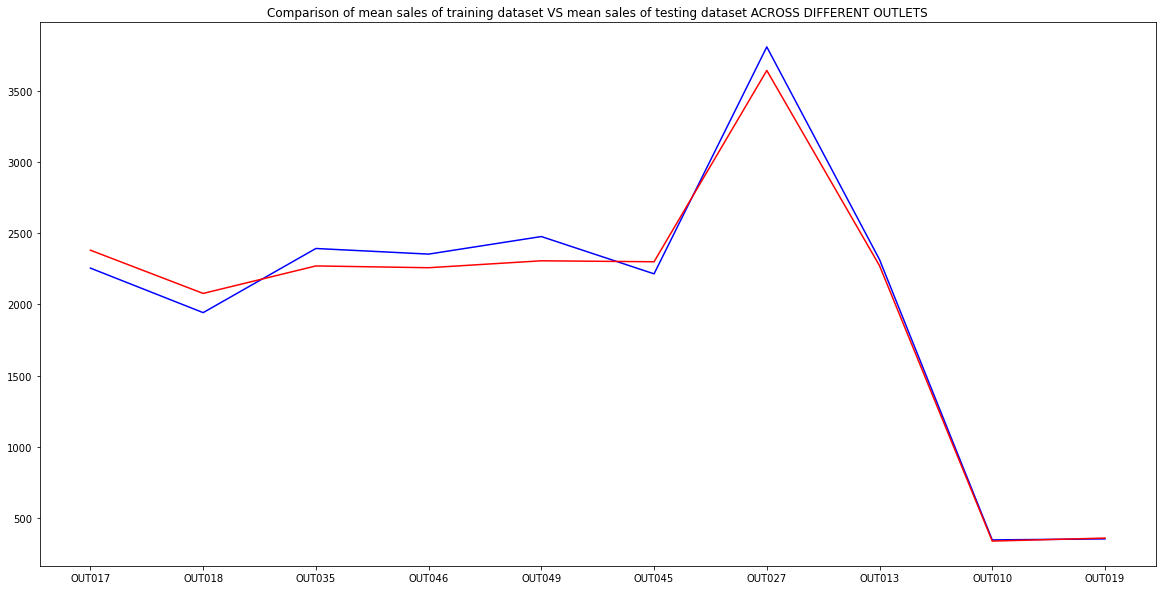

In [148]:
plt.figure(figsize=(20,10))

sns.lineplot(x=Outlet_list, y=avg_of_train_dataset, color='blue')
sns.lineplot(x=Outlet_list, y=predicted_avg_list, color='red')
plt.title('Comparison of mean sales of training dataset VS mean sales of testing dataset ACROSS DIFFERENT OUTLETS')
plt.show()

Text(0.5, 1.0, 'Mean predicted sales across different outlets')

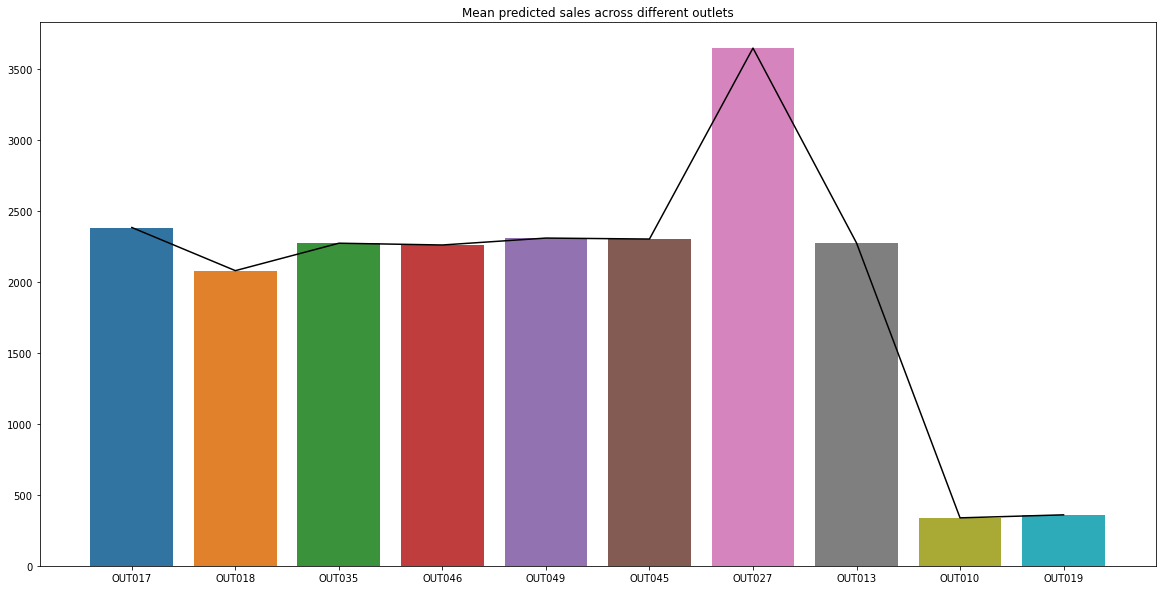

In [147]:
plt.figure(figsize=(20,10))
sns.barplot(x=Outlet_list, y=predicted_avg_list)
sns.lineplot(x=Outlet_list, y=predicted_avg_list, color='black')
plt.title("Mean predicted sales across different outlets")

In [151]:
tier1=testdata_with_predictions[testdata_with_predictions['Outlet_Location_Type']=='Tier 1']
tier2=testdata_with_predictions[testdata_with_predictions['Outlet_Location_Type']=='Tier 2']
tier3=testdata_with_predictions[testdata_with_predictions['Outlet_Location_Type']=='Tier 3']

Text(0.5, 1.0, 'Sales across Tier 1')

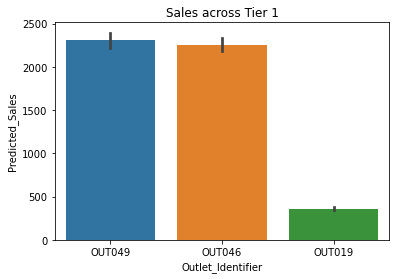

In [159]:

sns.barplot(x=tier1['Outlet_Identifier'], y=tier1['Predicted_Sales'])

plt.title("Sales across Tier 1 locations")

Text(0.5, 1.0, 'Sales across Tier 2')

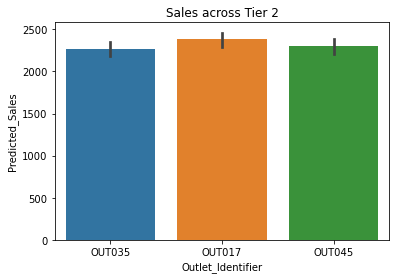

In [160]:
sns.barplot(x=tier2['Outlet_Identifier'], y=tier2['Predicted_Sales'])
plt.title("Sales across Tier 2 locations")

Text(0.5, 1.0, 'Sales across Tier 3')

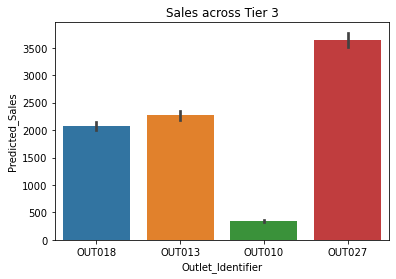

In [161]:
sns.barplot(x=tier3['Outlet_Identifier'], y=tier3['Predicted_Sales'])

plt.title("Sales across Tier 3 locations")